In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM 
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# #---------SEMEVAL

# import pickle 

# with open('/content/drive/MyDrive/Colab Notebooks/Semeval/bow/all_words_semeval_train_metonymic_10.pkl', mode='rb') as f:
#   metList = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Semeval/bow/all_words_semeval_train_literal_10.pkl', mode='rb') as f:
#   litList = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Semeval/bow/all_words_semeval_test_metonymic_10.pkl', mode='rb') as f:
#   metList_test = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Semeval/bow/all_words_semeval_test_literal_10.pkl', mode='rb') as f:
#   litList_test = pickle.load(f)
#   f.close()

In [ ]:
# #-----------CONLL

# import pickle 

# with open('/content/drive/MyDrive/Colab Notebooks/Conll/bow/all_words_conll_train_metonymic_10.pkl', mode='rb') as f:
#   metList = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Conll/bow/all_words_conll_train_literal_10.pkl', mode='rb') as f:
#   litList = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Conll/bow/all_words_conll_test_metonymic_10.pkl', mode='rb') as f:
#   metList_test = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Conll/bow/all_words_conll_test_literal_10.pkl', mode='rb') as f:
#   litList_test = pickle.load(f)
#   f.close()

In [ ]:
#---------WIMCOR

import pickle 

with open('/content/drive/MyDrive/Colab Notebooks/wimcor/bow/all_words_wimcor_train_metonymic_10.pkl', mode='rb') as f:
  metList = pickle.load(f)
  f.close()

with open('/content/drive/MyDrive/Colab Notebooks/wimcor/bow/all_words_wimcor_train_literal_10.pkl', mode='rb') as f:
  litList = pickle.load(f)
  f.close()

with open('/content/drive/MyDrive/Colab Notebooks/wimcor/bow/all_words_wimcor_test_metonymic_10.pkl', mode='rb') as f:
  metList_test = pickle.load(f)
  f.close()

with open('/content/drive/MyDrive/Colab Notebooks/wimcor/bow/all_words_wimcor_test_literal_10.pkl', mode='rb') as f:
  litList_test = pickle.load(f)
  f.close()

In [ ]:
# #--------RELOCAR

# import pickle 

# with open('/content/drive/MyDrive/Colab Notebooks/ReLocaR/bow/all_words_relocar_train_metonymic_10.pkl', mode='rb') as f:
#   metList = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/ReLocaR/bow/all_words_relocar_train_literal_10.pkl', mode='rb') as f:
#   litList = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/ReLocaR/bow/all_words_relocar_test_metonymic_10.pkl', mode='rb') as f:
#   metList_test = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/ReLocaR/bow/all_words_relocar_test_literal_10.pkl', mode='rb') as f:
#   litList_test = pickle.load(f)
#   f.close()

In [ ]:
import pandas as pd

MetTrainLabel = [1 for i in range(len(metList))]
MetTestLabel = [1 for i in range(len(metList_test))]
litTrainLabel = [0 for i in range(len(litList))]
litTestLabel = [0 for i in range(len(litList_test))]

dict1 = {'Sentence':metList, 'Label':MetTrainLabel}
dict2 = {'Sentence':litList, 'Label':litTrainLabel}

df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)
frame = [df1, df2]
df_train = pd.concat(frame)

dictA = {'Sentence':metList_test, 'Label':MetTestLabel}
dictB = {'Sentence':litList_test, 'Label':litTestLabel}

dfa = pd.DataFrame(dictA)
dfb = pd.DataFrame(dictB)
frame1 = [dfa, dfb]
df_test = pd.concat(frame1)
print(df_train,'\n-------',df_test)

                                                Sentence  Label
0            [from, to, played, on, team, the, for, one]      1
1      [with, many, for, to, some, such, as, the, by,...      1
2                           [the, on, by, now, with, to]      1
3      [the, because, declared, by, from, as, for, an...      1
4      [the, many, from, other, not, two, would, have...      1
...                                                  ...    ...
48481  [on, of, from, near, in, northern, the, high, ...      0
48482                 [in, united, kingdom, of, britain]      0
48483  [in, the, of, from, member, south, went, to, a...      0
48484                 [village, in, the, of, some, east]      0
48485                  [village, of, district, province]      0

[64519 rows x 2 columns] 
-------                                                 Sentence  Label
0      [over, go, on, to, domestic, international, many]      1
1      [after, first, now, one, the, secretary, to, f...      1
2    

In [ ]:
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_train = df_train.sample(frac=1).reset_index(drop=True)
print(df_train,'\n-------',df_test)

                                                Sentence  Label
0      [in, but, to, have, districts, the, of, out, i...      0
1                                             [east, in]      0
2      [in, the, of, to, since, when, for, subsidiary...      0
3               [on, in, the, to, there, from, included]      0
4      [the, city, least, area, of, on, ran, from, in...      0
...                                                  ...    ...
64514                 [in, on, the, same, year, for, to]      0
64515  [the, government, for, from, four, as, provide...      1
64516                           [have, on, the, are, by]      1
64517  [the, representing, on, against, for, to, as, ...      1
64518                  [the, in, province, to, city, of]      0

[64519 rows x 2 columns] 
-------                                                 Sentence  Label
0      [market, town, on, the, between, in, district,...      0
1      [during, the, part, of, province, from, area, ...      0
2    

In [ ]:
frame2 = [df_train, df_test]
dfAll = pd.concat(frame2)

# dfAll = dfAll.sample(frac=1).reset_index(drop=True)
# df_train, df_test = train_test_split(dfAll, test_size=0.2)

textAll = dfAll['Sentence'].tolist()
textTrain = df_train['Sentence'].tolist()
textTest = df_test['Sentence'].tolist()

token = Tokenizer()
token.fit_on_texts(textAll)
len(df_test)

39160

In [ ]:
vocab_size  = len(token.word_index)+1
vocab_size

7993

In [ ]:
encoded_textTrain = token.texts_to_sequences(textTrain)
encoded_textTest = token.texts_to_sequences(textTest)
print(len(encoded_textTrain), len(encoded_textTest))

64519 39160


In [ ]:
max_length = 24
X = pad_sequences(encoded_textTrain, maxlen=max_length, padding='post')
y = pad_sequences(encoded_textTest, maxlen=max_length, padding='post')
# X = pad_sequences(encoded_textTrain, maxlen=max_length+2, padding='pre')
# y = pad_sequences(encoded_textTest, maxlen=max_length+2, padding='pre')
print(X,'\n', X.shape)
print(y,'\n', y.shape)

[[  2  12   3 ...   0   0   0]
 [ 39   2   0 ...   0   0   0]
 [  2   1   4 ...   0   0   0]
 ...
 [ 17   6   1 ...   0   0   0]
 [  1 374   6 ...   0   0   0]
 [  1   2 135 ...   0   0   0]] 
 (64519, 24)
[[179  37   6 ...   0   0   0]
 [ 13   1  34 ...   0   0   0]
 [ 30  75  31 ...  60  96 252]
 ...
 [  1   5   8 ...   0   0   0]
 [  1   6 280 ...   0   0   0]
 [  2  24   4 ...   0   0   0]] 
 (39160, 24)


In [ ]:
%%time
import numpy as np

glove_vectors = dict()


# file = open('glove.twitter.27B.200d.txt', encoding='utf-8')
file = open('/content/drive/MyDrive/Colab Notebooks/GloVe 50D/glove.6B.50d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    word = values[0]
    #storing the word in the variable
    vectors = np.asarray(values[1: ])
    #storing the vector representation of the respective word in the dictionary
    glove_vectors[word] = vectors
file.close()

word_vector_matrix = np.zeros((vocab_size, 50))

for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
word_vector_matrix.shape    

CPU times: user 4.95 s, sys: 499 ms, total: 5.45 s
Wall time: 5.39 s


In [ ]:
X_train = X
X_test = y

y_train = df_train['Label']
y_test = df_test['Label']
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print(X_train, ' ',X_train.shape,'\n')
print(X_test, ' ',X_test.shape)


[[  2  12   3 ...   0   0   0]
 [ 39   2   0 ...   0   0   0]
 [  2   1   4 ...   0   0   0]
 ...
 [ 17   6   1 ...   0   0   0]
 [  1 374   6 ...   0   0   0]
 [  1   2 135 ...   0   0   0]]   (64519, 24) 

[[179  37   6 ...   0   0   0]
 [ 13   1  34 ...   0   0   0]
 [ 30  75  31 ...  60  96 252]
 ...
 [  1   5   8 ...   0   0   0]
 [  1   6 280 ...   0   0   0]
 [  2  24   4 ...   0   0   0]]   (39160, 24)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, a_test, y_train, b_test = train_test_split(X_train, y_train, 
                                                    train_size=0.67, 
                                                    random_state=42)

print(X_train, ' ',X_train.shape,'\n')
print(a_test, ' ',b_test.shape)


[[  1   8   7 ...   0   0   0]
 [  3  31   1 ...   0   0   0]
 [ 65  43  17 ...   0   0   0]
 ...
 [ 79   3   1 ...   0   0   0]
 [  1  52  11 ...   0   0   0]
 [ 21  64 316 ...   3   0   0]]   (43227, 24) 

[[ 17   2   0 ...   0   0   0]
 [  4   5   2 ...   0   0   0]
 [  2   7   1 ...   0   0   0]
 ...
 [  1  68   4 ...   0   0   0]
 [ 89   2   1 ...   0   0   0]
 [127   6   1 ...   0   0   0]]   (21292, 1)


In [ ]:
vec_size = 50

accuracies = []
precisions = []
recalls = []
f1s = []

for i in range(1):

  model = Sequential()
  model.add(Embedding(vocab_size, vec_size, input_length=max_length,
                      weights = [word_vector_matrix], trainable = False))
  model.add(Conv1D(64, 12, activation = 'relu'))
  model.add(MaxPooling1D(2))
  # LSTM(100)
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(16, activation='relu'))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
  classifier = model.fit(X_train, y_train, epochs =5, validation_data = (a_test, b_test))
  accuracies.append(classifier.history["val_accuracy"][-1])

  # yhat_probs = model.predict(X_test, verbose=0)
  # yhat_classes = model.predict(X_test, verbose=0)

  # yhat_probs = yhat_probs[:, 0]
  # yhat_classes = yhat_classes[:, 0]

  # yhat_probs
    
  # accuracy = accuracy_score(y_test, yhat_classes)
  # precision = precision_score(y_test, yhat_classes)
  # recall = recall_score(y_test, yhat_classes)
  # f1 = f1_score(y_test, yhat_classes)

  # accuracies.append(accuracy)
  # precisions.append(precision)
  # recalls.append(recall)
  # f1s.append(f1)

print('Training is DONE...')

Epoch 1/5
1351/1351 [==============================] - 10s 6ms/step - loss: 0.3098 - accuracy: 0.8647 - val_loss: 0.1286 - val_accuracy: 0.9667
Epoch 2/5
1351/1351 [==============================] - 8s 6ms/step - loss: 0.1252 - accuracy: 0.9575 - val_loss: 0.0745 - val_accuracy: 0.9809
Epoch 3/5
1351/1351 [==============================] - 8s 6ms/step - loss: 0.0807 - accuracy: 0.9734 - val_loss: 0.0553 - val_accuracy: 0.9839
Epoch 4/5
1351/1351 [==============================] - 8s 6ms/step - loss: 0.0614 - accuracy: 0.9803 - val_loss: 0.0462 - val_accuracy: 0.9873
Epoch 5/5
1351/1351 [==============================] - 7s 5ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0429 - val_accuracy: 0.9884
Training is DONE...


In [ ]:

yhat = model.predict(X_test, verbose=0)

yhat = np.where(yhat > 0.5, 1, 0)

yhat = yhat.flatten()
yhat = yhat.tolist()

selection = []
for i in range(len(yhat)):
  if y_test[i] == yhat[i]:
    selection.append(0)
  else:
    selection.append(1)

selection.count(0)




38728

In [ ]:
sl = pd.DataFrame(selection)
sl.columns = ['pred']
erroranalysis = pd.concat([sl,df_test],axis=1)
erroranalysis

,pred,Sentence,Label
0,0,"[market, town, on, the, between, in, district,...",0
1,0,"[during, the, part, of, province, from, area, ...",0
2,0,"[there, still, some, to, the, new, of, as, set...",0
3,0,"[the, new, year, for, during, following, to, 2...",1
4,0,"[in, on, to, where, new, high, state, the, fro...",0
...,...,...,...
39155,0,"[for, with, the, by]",1
39156,0,"[county, in, met, the, entire, of, west, east]",0
39157,0,"[the, as, from, to, for, on, us]",1
39158,0,"[the, on, officers, there, as, since, into, to...",0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
len(df_test)

1000

In [ ]:
np.mean(accuracies)

0.8558369994163513

In [ ]:
np.std(accuracies)

0.010277747283133548

In [ ]:
from statistics import *
# std_acc = []
# for i in range(len(accuracies)):
#   std_acc.append(i)
avgAcc = mean(accuracies)
print("The average is ", round(avgAcc,4))
arr = np.array(accuracies)
print('\nstd is: ',np.std(arr))

avgP =  mean(precisions)
print("\nThe precisions average is ", round(avgP,4))
avgR = mean(recalls)
print("\nThe recalls average is ", round(avgR,4))
avgF1 = mean(f1s)
print("\nThe f1s average is ", round(avgF1,4))

matrix = confusion_matrix(y_test, yhat_classes)
print('the matrix:\n',matrix)

The average is  0.7941

std is:  0.0

The precisions average is  0.0

The recalls average is  0.0

The f1s average is  0.0
the matrix:
 [[721   0]
 [187   0]]


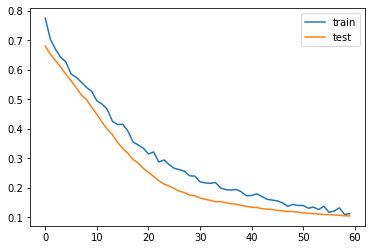

In [ ]:
import matplotlib.pyplot as plt

plt.plot(classifier.history['loss'], label='train')
plt.plot(classifier.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# _, train_acc = model.evaluate(X_train, y_train, verbose=0)
# _, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))